# Cinétique inflorescences

Dans ce script, on va mettre les cinétiques des inflorescences issues du fichier donnees.floraison.

Nous allons essayer de reproduire ces cinétiques de plusieurs façons. 

## Importation des librairies 

In [1]:
from scipy.optimize import least_squares
import numpy as np
import csv
import random
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.stats import norm
import scipy
from datetime import date, timedelta
from IPython.display import Image
import os
from pandas import *
from itertools import *
from CinetiqueInflorescencesFonctions1 import *
from math import *
import pylab

# Graphes pour les données réelles (dates de passage exactes) du fichier donnees.floraison

## Bloc1

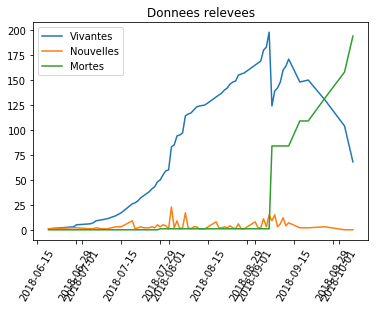

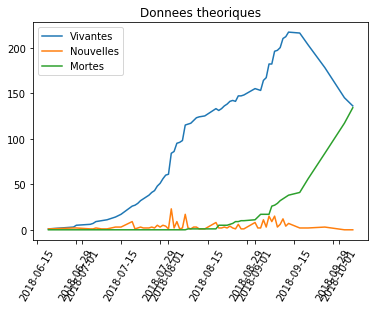

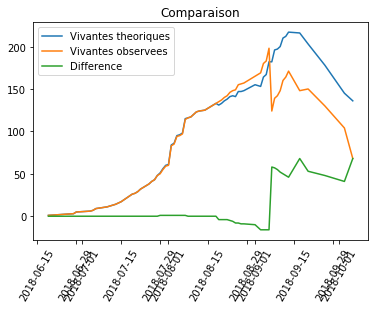

In [5]:
plot_(Bloc1_Jours, Bloc1_nouvelles, Bloc1_vivantes, Bloc1_mortes, Bloc1_vivantes_theo, Bloc1_mortes_theo)

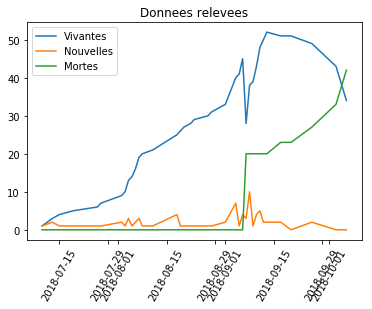

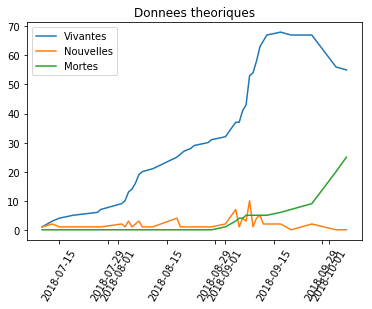

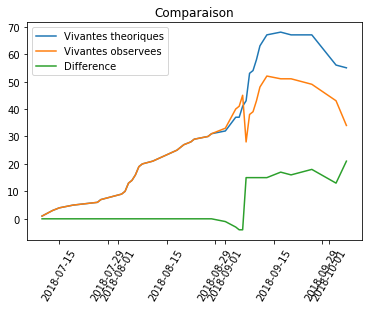

In [6]:
plot_(Bloc1_bache_Jours, Bloc1_bache_nouvelles, Bloc1_bache_vivantes, Bloc1_bache_mortes, Bloc1_bache_vivantes_theo, Bloc1_bache_mortes_theo)

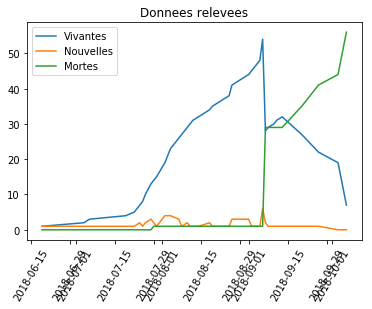

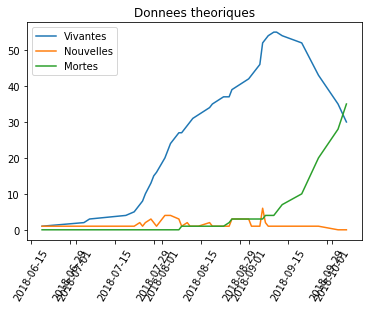

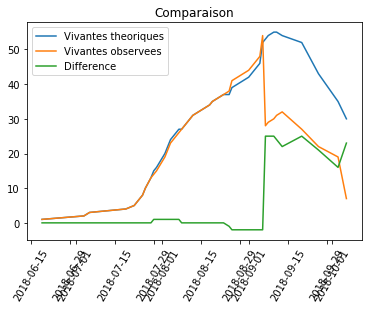

In [7]:
plot_(Bloc1_enh_ras_Jours, Bloc1_enh_ras_nouvelles, Bloc1_enh_ras_vivantes, Bloc1_enh_ras_mortes, Bloc1_enh_ras_vivantes_theo, Bloc1_enh_ras_mortes_theo)

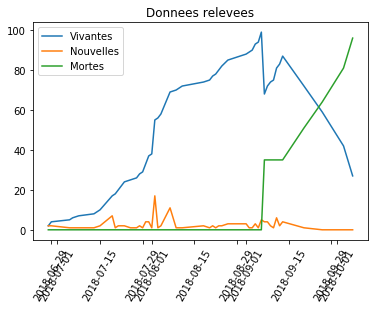

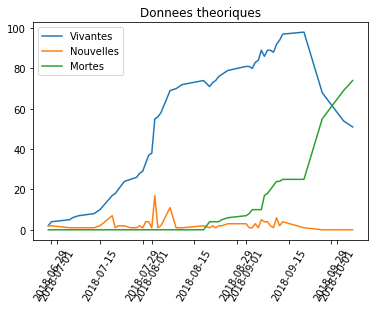

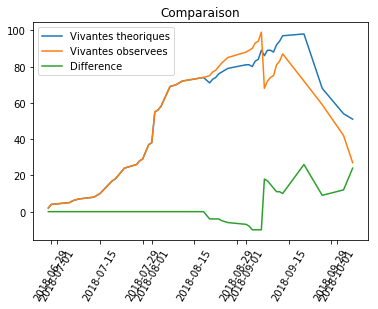

In [8]:
plot_(Bloc1_enh_haut_Jours, Bloc1_enh_haut_nouvelles, Bloc1_enh_haut_vivantes, Bloc1_enh_haut_mortes, Bloc1_enh_haut_vivantes_theo, Bloc1_enh_haut_mortes_theo)

## Lissage des données

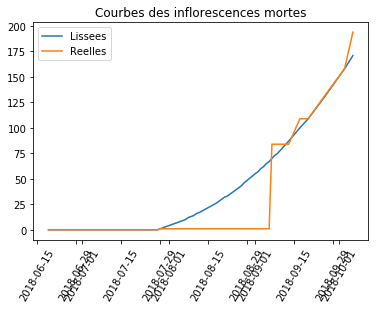

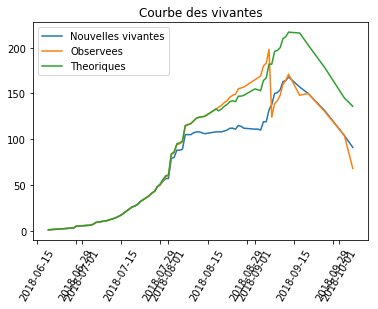

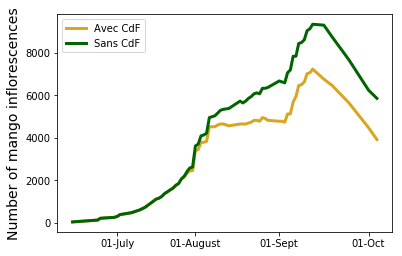

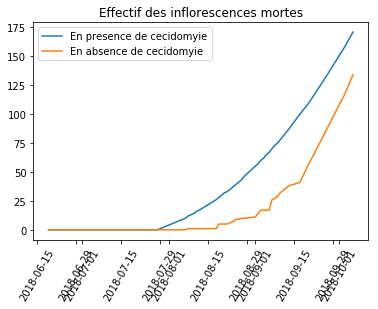

In [11]:
# BLOC 1

nbReleve = len(Bloc1_Jours)

xx = np.zeros(nbReleve)
for i in range (nbReleve) :
    xx[i] = int((Bloc1_Jours[i]-Bloc1_Jours[0]).days)

x1 = [0,20,61,63]
x2 = [xx[x1[0]],xx[x1[1]],xx[x1[2]],xx[x1[3]]]
mortes = list(Bloc1_mortes)
y = [mortes[x1[0]],mortes[x1[1]],mortes[x1[2]],mortes[x1[3]]]

A = np.array([[x2[0]**3,x2[0]**2,x2[0],1],[x2[1]**3,x2[1]**2,x2[1],1],[x2[2]**3,x2[2]**2,x2[2],1],[x2[3]**3,x2[3]**2,x2[3],1]])
a,b,c,d = np.linalg.solve(A,y)

yy = a*xx**3+b*xx**2+c*xx+d

yy[0:20] = mortes[0:20]

for i in range (nbReleve):
    if (yy[i]>int(yy[i])):
        yy[i] = int(yy[i])+1

Bloc1_real_mortes = Series(yy,index=Bloc1_Jours)
plt.plot(Bloc1_real_mortes,label="Lissees")
plt.plot(Bloc1_mortes,label="Reelles")
plt.title("Courbes des inflorescences mortes")
plt.xticks(rotation=60)
plt.legend()
plt.show()

Bloc1_new_vivantes = np.zeros(nbReleve)
nouvelles = list(Bloc1_nouvelles)
for i in range (nbReleve):
    Bloc1_new_vivantes[i] = sum(nouvelles[0:(i+1)])

Bloc1_real_vivantes = np.zeros(nbReleve)
for i in range (nbReleve):
    Bloc1_real_vivantes[i:nbReleve] = Bloc1_new_vivantes[i:nbReleve] - yy[i]
    
f = read_excel('../../Fichiers de donnees/Donnees re organisees/Fichier donnees floraison/Bloc1.xls')
f['alive'] = Bloc1_real_vivantes
f['dead']  = yy
f['new'] = nouvelles
writer = ExcelWriter('../../Fichiers de donnees/Donnees re organisees/Fichier donnees floraison/Avec lissage/Bloc1.xls')
f.to_excel(writer,'1')
writer.save()

Bloc1_real_vivantes = Series(Bloc1_real_vivantes,index=Bloc1_Jours)
plt.plot(Bloc1_real_vivantes,label="Nouvelles vivantes")
plt.plot(Bloc1_vivantes,label="Observees")
plt.plot(Bloc1_vivantes_theo,label="Theoriques")
plt.title("Courbe des vivantes")
plt.xticks(rotation=60)
plt.legend()
plt.show()

plt.plot(xx,Bloc1_real_vivantes*43,label="Avec CdF",color="goldenrod",linewidth=3.0)
plt.plot(xx,Bloc1_vivantes_theo*43,label="Sans CdF",color="darkgreen",linewidth=3.0)
plt.xticks(np.array([xx[4],xx[24],xx[47],xx[63]]),("01-July","01-August","01-Sept","01-Oct"))
plt.ylabel("Number of mango inflorescences",fontsize=14)
plt.legend()
pylab.savefig("Graphe.png")
plt.show()

plt.plot(Bloc1_real_mortes,label="En presence de cecidomyie")
plt.plot(Bloc1_mortes_theo,label="En absence de cecidomyie")
plt.title("Effectif des inflorescences mortes")
plt.xticks(rotation=60)
plt.legend()
plt.show()

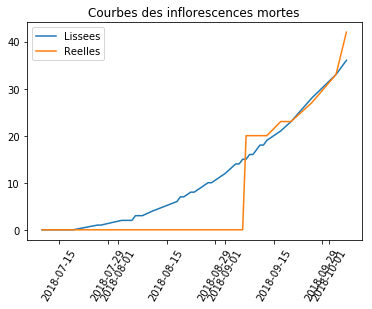

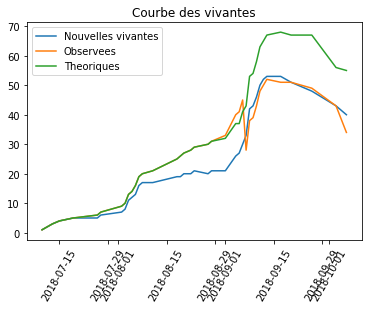

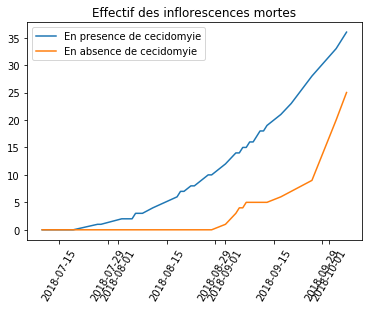

IndexError: index 47 is out of bounds for axis 0 with size 37

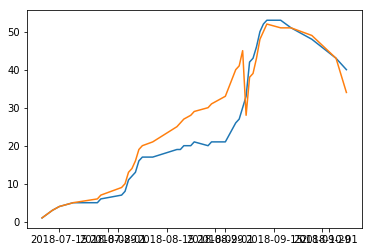

In [12]:
# BLOC 1 bache

nbReleve = len(Bloc1_bache_Jours)

xx = np.zeros(nbReleve)
for i in range (nbReleve) :
    xx[i] = int((Bloc1_bache_Jours[i]-Bloc1_bache_Jours[0]).days)

x1 = [0,33,35]
x2 = [xx[x1[0]],xx[x1[1]],xx[x1[2]]]
mortes = list(Bloc1_bache_mortes)
y = [mortes[x1[0]],mortes[x1[1]],mortes[x1[2]]]

A = np.array([[x2[0]**2,x2[0],1],[x2[1]**2,x2[1],1],[x2[2]**2,x2[2],1]])
a,b,c = np.linalg.solve(A,y)

yy = a*xx**2+b*xx+c

for i in range (nbReleve):
    if (yy[i]<0):
        yy[i] = mortes[i]
    if (yy[i]>int(yy[i])):
        yy[i] = int(yy[i])+1

Bloc1_bache_real_mortes = Series(yy,index=Bloc1_bache_Jours)
plt.plot(Bloc1_bache_real_mortes,label="Lissees")
plt.plot(Bloc1_bache_mortes,label="Reelles")
plt.title("Courbes des inflorescences mortes")
plt.xticks(rotation=60)
plt.legend()
plt.show()

Bloc1_bache_new_vivantes = np.zeros(nbReleve)
nouvelles = list(Bloc1_bache_nouvelles)
for i in range (nbReleve):
    Bloc1_bache_new_vivantes[i] = sum(nouvelles[0:(i+1)])

Bloc1_bache_real_vivantes = np.zeros(nbReleve)
for i in range (nbReleve):
    Bloc1_bache_real_vivantes[i:nbReleve] = Bloc1_bache_new_vivantes[i:nbReleve] - yy[i]
    
f = read_excel('../../Fichiers de donnees/Donnees re organisees/Fichier donnees floraison/Bloc1_bache.xls')
f['alive'] = Bloc1_bache_real_vivantes
f['dead']  = yy
f['new'] = nouvelles
writer = ExcelWriter('../../Fichiers de donnees/Donnees re organisees/Fichier donnees floraison/Avec lissage/Bloc1_bache.xls')
f.to_excel(writer,'1')
writer.save()

Bloc1_bache_real_vivantes = Series(Bloc1_bache_real_vivantes,index=Bloc1_bache_Jours)
plt.plot(Bloc1_bache_real_vivantes,label="Nouvelles vivantes")
plt.plot(Bloc1_bache_vivantes,label="Observees")
plt.plot(Bloc1_bache_vivantes_theo,label="Theoriques")
plt.title("Courbe des vivantes")
plt.xticks(rotation=60)
plt.legend()
plt.show()

plt.plot(Bloc1_bache_real_mortes,label="En presence de cecidomyie")
plt.plot(Bloc1_bache_mortes_theo,label="En absence de cecidomyie")
plt.title("Effectif des inflorescences mortes")
plt.xticks(rotation=60)
plt.legend()
plt.show()

plt.plot(Bloc1_bache_real_vivantes,label="Nouvelles vivantes")
plt.plot(Bloc1_bache_vivantes,label="Observees")
plt.xticks(np.array([xx[4],xx[24],xx[47],xx[63]]),("01-July","01-August","01-Sept","01-Oct"))
plt.ylabel("Number of mango inflorescences",fontsize=14)
plt.legend()
pylab.savefig("Graphe.png")

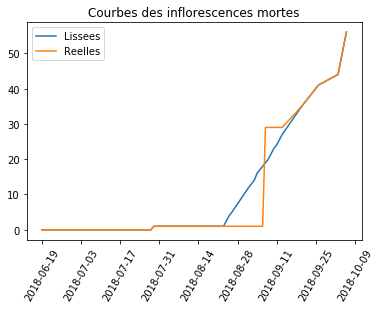

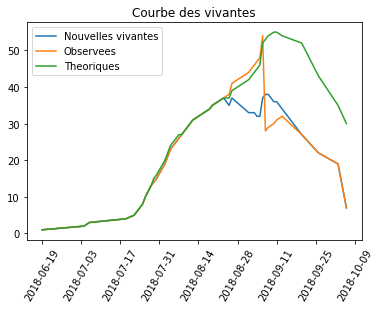

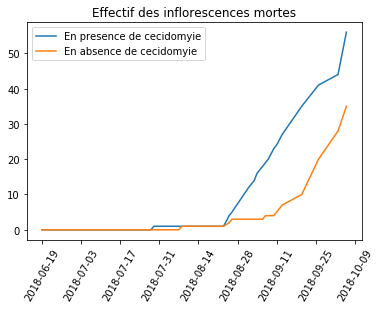

In [8]:
# BLOC 1 enherbement ras

nbReleve = len(Bloc1_enh_ras_Jours)

xx = np.zeros(nbReleve)
for i in range (nbReleve) :
    xx[i] = int((Bloc1_enh_ras_Jours[i]-Bloc1_enh_ras_Jours[0]).days)

x1 = [22,36,nbReleve-1]
x2 = [xx[x1[0]],xx[x1[1]],xx[x1[2]]]
mortes = list(Bloc1_enh_ras_mortes)
y = [mortes[x1[0]],mortes[x1[1]],mortes[x1[2]]]

A = np.array([[x2[0]**2,x2[0],1],[x2[1]**2,x2[1],1],[x2[2]**2,x2[2],1]])
a,b,c = np.linalg.solve(A,y)

yy = a*xx**2+b*xx+c

for i in range (nbReleve):
    if (yy[i]<0):
        yy[i] = mortes[i]
    if (yy[i]>int(yy[i])):
        yy[i] = int(yy[i])+1
yy[0:22] = mortes[0:22]
yy[36:nbReleve] = mortes[36:nbReleve]

Bloc1_enh_ras_real_mortes = Series(yy,index=Bloc1_enh_ras_Jours)
plt.plot(Bloc1_enh_ras_real_mortes,label="Lissees")
plt.plot(Bloc1_enh_ras_mortes,label="Reelles")
plt.title("Courbes des inflorescences mortes")
plt.xticks(rotation=60)
plt.legend()
plt.show()

Bloc1_enh_ras_new_vivantes = np.zeros(nbReleve)
nouvelles = list(Bloc1_enh_ras_nouvelles)
for i in range (nbReleve):
    Bloc1_enh_ras_new_vivantes[i] = sum(nouvelles[0:(i+1)])

Bloc1_enh_ras_real_vivantes = np.zeros(nbReleve)
for i in range (nbReleve):
    Bloc1_enh_ras_real_vivantes[i:nbReleve] = Bloc1_enh_ras_new_vivantes[i:nbReleve] - yy[i]
    
f = read_excel('../../Fichiers de donnees/Donnees re organisees/Fichier donnees floraison/Bloc1_enh_ras.xls')
f['alive'] = Bloc1_enh_ras_real_vivantes
f['dead']  = yy
f['new'] = nouvelles
writer = ExcelWriter('../../Fichiers de donnees/Donnees re organisees/Fichier donnees floraison/Avec lissage/Bloc1_enh_ras.xls')
f.to_excel(writer,'1')
writer.save()

Bloc1_enh_ras_real_vivantes = Series(Bloc1_enh_ras_real_vivantes,index=Bloc1_enh_ras_Jours)
plt.plot(Bloc1_enh_ras_real_vivantes,label="Nouvelles vivantes")
plt.plot(Bloc1_enh_ras_vivantes,label="Observees")
plt.plot(Bloc1_enh_ras_vivantes_theo,label="Theoriques")
plt.title("Courbe des vivantes")
plt.xticks(rotation=60)
plt.legend()
plt.show()

plt.plot(Bloc1_enh_ras_real_mortes,label="En presence de cecidomyie")
plt.plot(Bloc1_enh_ras_mortes_theo,label="En absence de cecidomyie")
plt.title("Effectif des inflorescences mortes")
plt.xticks(rotation=60)
plt.legend()
plt.show()

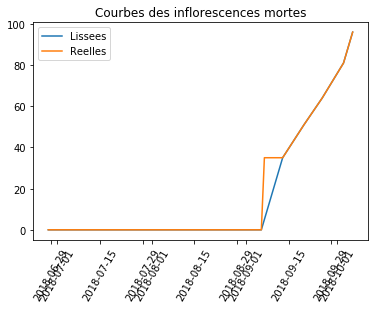

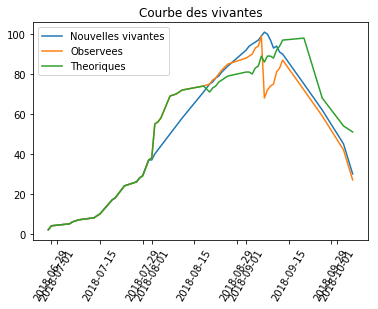

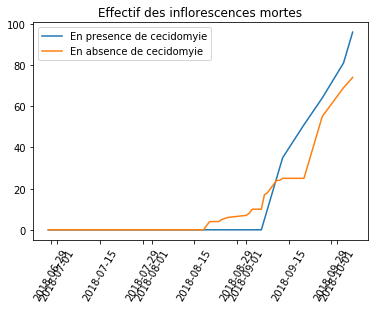

In [14]:
# BLOC 1 enherbement haut

nbReleve = len(Bloc1_enh_haut_Jours)

xx = np.zeros(nbReleve)
for i in range (nbReleve) :
    xx[i] = int((Bloc1_enh_haut_Jours[i]-Bloc1_enh_haut_Jours[0]).days)
    
    
## On lisse les vivantes en jouant sur les nouvelles inflorescences
x1 = [18,30,38]
x2 = [xx[x1[0]],xx[x1[1]],xx[x1[2]]]
vivantes = list(Bloc1_enh_haut_vivantes)
y = [vivantes[x1[0]],vivantes[x1[1]],vivantes[x1[2]]]

A = np.array([[x2[0]**2,x2[0],1],[x2[1]**2,x2[1],1],[x2[2]**2,x2[2],1]])
a,b,c = np.linalg.solve(A,y)

yy1 = a*xx**2+b*xx+c

yy1[0:18] = vivantes[0:18]
yy1[39:nbReleve] = vivantes[39:nbReleve]

for i in range (nbReleve):
    if (yy1[i]>float(int(yy1[i]))):
        yy1[i] = int(yy1[i])

yy_ = list(Bloc1_enh_haut_nouvelles)
for i in range (18,38):
    yy_[i] = yy1[i]-yy1[i-1]

Bloc1_enh_haut_real_nouvelles = Series(yy_,index=Bloc1_enh_haut_Jours)

## On lisse les vivantes en jouant sur les inflorescences mortes
x1 = [38,45]
x2 = [xx[x1[0]],xx[x1[1]]]
mortes = list(Bloc1_enh_haut_mortes)
y = [mortes[x1[0]],mortes[x1[1]]]

A = np.array([[x2[0],1],[x2[1],1]])
a,b = np.linalg.solve(A,y)

yy2 = a*xx+b

yy2[0:38] = mortes[0:38]
yy2[46:nbReleve] = mortes[46:nbReleve]

Bloc1_enh_haut_real_mortes = Series(yy2,index=Bloc1_enh_haut_Jours)
plt.plot(Bloc1_enh_haut_real_mortes,label="Lissees")
plt.plot(Bloc1_enh_haut_mortes,label="Reelles")
plt.title("Courbes des inflorescences mortes")
plt.xticks(rotation=60)
plt.legend()
plt.show()

Bloc1_enh_haut_new_vivantes = yy_
nouvelles = list(Bloc1_enh_haut_real_nouvelles)
for i in range (nbReleve):
    Bloc1_enh_haut_new_vivantes[i] = sum(nouvelles[0:(i+1)])

Bloc1_enh_haut_real_vivantes = np.zeros(nbReleve)


for i in range (nbReleve):
    Bloc1_enh_haut_real_vivantes[i:nbReleve] = Bloc1_enh_haut_new_vivantes[i:nbReleve] - yy2[i]

Bloc1_enh_haut_real_vivantes[0:39] = yy1[0:39]
    
f = read_excel('../../Fichiers de donnees/Donnees re organisees/Fichier donnees floraison/Bloc1_enh_haut.xls')
f['alive'] = Bloc1_enh_haut_real_vivantes
f['dead']  = yy2
f['new'] = list(Bloc1_enh_haut_real_nouvelles)
writer = ExcelWriter('../../Fichiers de donnees/Donnees re organisees/Fichier donnees floraison/Avec lissage/Bloc1_enh_haut.xls')
f.to_excel(writer,'1')
writer.save()

Bloc1_enh_haut_real_vivantes = Series(Bloc1_enh_haut_real_vivantes,index=Bloc1_enh_haut_Jours)
plt.plot(Bloc1_enh_haut_real_vivantes,label="Nouvelles vivantes")
plt.plot(Bloc1_enh_haut_vivantes,label="Observees")
plt.plot(Bloc1_enh_haut_vivantes_theo,label="Theoriques")
plt.title("Courbe des vivantes")
plt.xticks(rotation=60)
plt.legend()
plt.show()

plt.plot(Bloc1_enh_haut_real_mortes,label="En presence de cecidomyie")
plt.plot(Bloc1_enh_haut_mortes_theo,label="En absence de cecidomyie")
plt.title("Effectif des inflorescences mortes")
plt.xticks(rotation=60)
plt.legend()
plt.show()

### Description des graphes

D'après le fichier donnees.floraison, nous avons la date d'apparition du stade C, autrement dit, la date de naissance de l'inflorescence et sa date de mort.

Description des graphes ci-dessus :

1. Dans le graphe 1, nous avons mis le nombre de nouvelles inflorescences à chaque date d'observation, le nombre d'inflorescences vivantes à chaque date d'observation (on compte une inflo vivante à une date d'observation donnée si cette dernière est comprise entre la date d'apparition du stade C et la date de mort) et le nombre d'inflorescences mortes à chaque date d'observation (on compte un inflo morte à une date d'observation donnée si cette dernière est postérieure à la date de mort).

2. Dans le graphe 2, nous avons mis le nombre de nouvelles inflorescences à chaque date d'observation, le nombre théorique d'inflorescences vivantes à chaque date d'observation et le nombre théorique d'inflorescences mortes à chaque date d'observations. D'après les données d'Anne-Sarah, on sait que la durée de vie d'une inflorescence est de 50 jours. Donc, si à une date donnée, une inflorescence apparaît, théoriquement, elle mourra 50 jours plus tard. De là, on en déduit les jours où elle est vivante ou morte. 

3. Dans le graphe 3, nous avons mis les nombres observé et théorique d'inflorescences vivantes, et la différence. 

Que peut-on en conclure? 

Les courbes des effectifs observé et théorique des vivantes se suivent "parfaitement" jusqu'à début septembre. Ensuite, le nombre théorique d'inflorescences vivantes continue d'augmenter, puis diminue plus tard doucement. Alors que le nombre simulé diminue directement. Ces observations sont logiques car la durée de vie théorique utilisée est valable pour une inflorescence saine et non des inflorescences attaquées par les cécidomyies. Ici, on fait comme si toutes les inflorescences étaient saines. 

## Lien entre les données des fichiers données floraison et piège

In [1]:
from CinetiqueInflorescencesFonctions2 import *

FileNotFoundError: [Errno 2] No such file or directory: '../../Fichiers de donnees/Donnees re organisees/Fichier piege/Bloc1_semaine.xls'

OBJECTIFS :
1. On veut superposer les cinétiques des inflorescences vivantes du fichier donnees.floraison et celles du fichier piege. Faire des observations à vue d'oeil.
2. On veut estimer un paramètre $\alpha$ tel que $I_{fichier\_piege} = \alpha \times I_{fichier donnees.floraison}$. Faire des commentaires. 
3. Valider un $\alpha$.
4. Utiliser ce $\alpha$ pour obtenir le nombre de nouvelles inflorescences et de larves à l'échelle du verger. Transposer de donnees.floraison vers piege. 

In [11]:
a0 = np.arange(-50,50.1,0.5)
p0 = a0

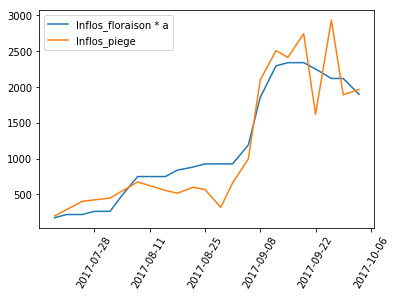

[44.13503435]
26007
26789.965852797188


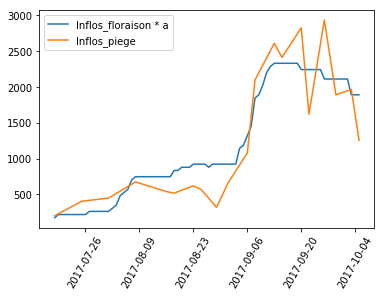

[43.97013452]
92130
94843.58015072347


In [12]:
# données semaine
a1_bache_s = visual_optimization(date_1_bache_s,donnees_floraison_vivantes_bloc1_bache_s,piege_inflo_bloc1_bache_s,p0)
print (a1_bache_s)
print (np.sum(piege_inflo_bloc1_bache_s))
print (np.sum(donnees_floraison_vivantes_bloc1_bache_s*a1_bache_s))

# données jour
a1_bache_j = visual_optimization(date_1_bache_j,donnees_floraison_vivantes_bloc1_bache_j,piege_inflo_bloc1_bache_j,p0)
print (a1_bache_j)
print (np.sum(piege_inflo_bloc1_bache_j))
print (np.sum(donnees_floraison_vivantes_bloc1_bache_j*a1_bache_j))

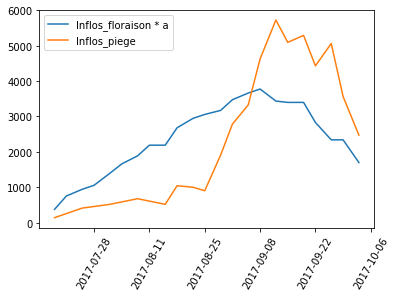

[37.7559967]
51416
54670.68322753906


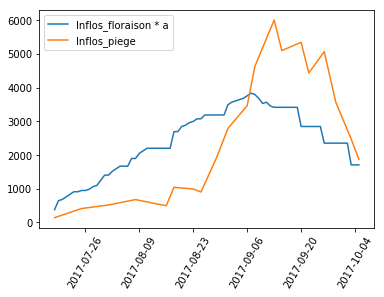

[37.92495728]
181832
194137.8562927246


In [13]:
# données semaine
a1_enh_haut_s = visual_optimization(date_1_enh_haut_s,donnees_floraison_vivantes_bloc1_enh_haut_s,piege_inflo_bloc1_enh_haut_s,p0)
print (a1_enh_haut_s)
print (np.sum(piege_inflo_bloc1_enh_haut_s))
print (np.sum(donnees_floraison_vivantes_bloc1_enh_haut_s*a1_enh_haut_s))

# données jour
a1_enh_haut_j = visual_optimization(date_1_enh_haut_j,donnees_floraison_vivantes_bloc1_enh_haut_j,piege_inflo_bloc1_enh_haut_j,p0)
print (a1_enh_haut_j)
print (np.sum(piege_inflo_bloc1_enh_haut_j))
print (np.sum(donnees_floraison_vivantes_bloc1_enh_haut_j*a1_enh_haut_j))

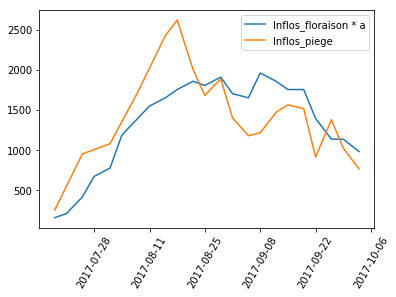

[51.59830479]
31972
30649.393045648376


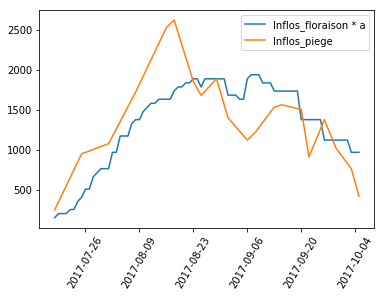

[51.01665497]
111996
107543.1086730957


In [14]:
# données semaine
a1_enh_ras_s = visual_optimization(date_1_enh_ras_s,donnees_floraison_vivantes_bloc1_enh_ras_s,piege_inflo_bloc1_enh_ras_s,p0)
print (a1_enh_ras_s)
print (np.sum(piege_inflo_bloc1_enh_ras_s))
print (np.sum(donnees_floraison_vivantes_bloc1_enh_ras_s*a1_enh_ras_s))

# données jour
a1_enh_ras_j = visual_optimization(date_1_enh_ras_j,donnees_floraison_vivantes_bloc1_enh_ras_j,piege_inflo_bloc1_enh_ras_j,p0)
print (a1_enh_ras_j)
print (np.sum(piege_inflo_bloc1_enh_ras_j))
print (np.sum(donnees_floraison_vivantes_bloc1_enh_ras_j*a1_enh_ras_j))